In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [91]:
#log_dir = '/neurospin/dico/jlaval/Output/2024-10-15/15-35-05_117/log_output.log'
#log_dir = '/neurospin/dico/jlaval/Output/2024-10-15/16-03-47_195/log_output.log'
#log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/09-56-56_7/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-25-12_57/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-29-17_145/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-35-52_60/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-42-00_14/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-51-48_52/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/10-58-18_79/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/13-42-57_199/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/13-44-00_40/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/10-58-18_79/log_output.log'



In [92]:
data = pd.read_csv(log_dir, delimiter = ",", header = None, skiprows=9)
data.columns=['cutout', 'nb_vx', 'nb_vx_without_bottoms', 'nb_vx_after_without_bottoms']
print(data)
print(data.head())

                               cutout  nb_vx  nb_vx_without_bottoms  \
0         INFO:augmentations.py: True    679                    555   
1        INFO:augmentations.py: False    529                    431   
2         INFO:augmentations.py: True    610                    507   
3        INFO:augmentations.py: False    597                    479   
4        INFO:augmentations.py: False    768                    630   
...                               ...    ...                    ...   
1205423   INFO:augmentations.py: True    666                    543   
1205424  INFO:augmentations.py: False    664                    543   
1205425  INFO:augmentations.py: False    563                    451   
1205426   INFO:augmentations.py: True    494                    401   
1205427  INFO:augmentations.py: False    629                    506   

         nb_vx_after_without_bottoms  
0                                458  
1                                232  
2                             

In [93]:
l = data['cutout'].tolist()
data['cutout'] = [elem[-5:] for elem in l]

In [94]:
# for cutout
data_cutout = data.loc[data['cutout']==' True']
np.mean(data_cutout['nb_vx']), np.mean(data_cutout['nb_vx_without_bottoms']), np.mean(data_cutout['nb_vx_after_without_bottoms'])

(614.9510782307572, 497.3363334355091, 379.7358744728972)

In [95]:
# for cutin
data_cutin = data.loc[data['cutout']=='False']
np.mean(data_cutin['nb_vx']), np.mean(data_cutin['nb_vx_without_bottoms']), np.mean(data_cutin['nb_vx_after_without_bottoms'])

(614.9674443796489, 497.35472417855, 223.2884050819664)

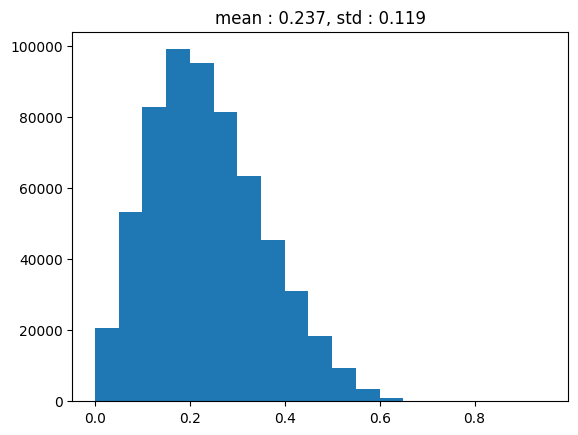

In [96]:
## plot the distributions of the proportion of non 30 vx removed
# cutout
l_before = data_cutout['nb_vx_without_bottoms'].tolist()
l_after = data_cutout['nb_vx_after_without_bottoms'].tolist()
removed_cutout = [(before - after) / before for before, after in zip(l_before, l_after)]
plt.hist(removed_cutout, bins=np.arange(0,1,0.05))
plt.title(f"mean : {np.mean(removed_cutout):.3f}, std : {np.std(removed_cutout):.3f}")
plt.show()

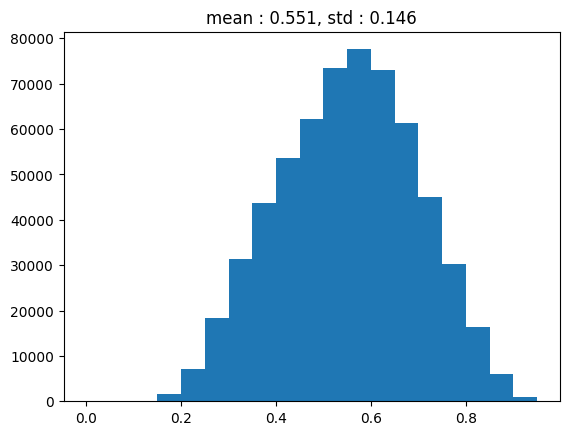

In [97]:
# cutin
l_before = data_cutin['nb_vx_without_bottoms'].tolist()
l_after = data_cutin['nb_vx_after_without_bottoms'].tolist()
removed_cutin = [(before - after) / before for before, after in zip(l_before, l_after)]
plt.hist(removed_cutin, bins=np.arange(0,1,0.05))
plt.title(f"mean : {np.mean(removed_cutin):.3f}, std : {np.std(removed_cutin):.3f}")
plt.show()